In [1]:
#Gabriel Maldonado ID: 801071135
#Homework #1

#https://github.com/Gmaldonad17/4105-Machine-Learning/tree/main/HW1

In [2]:
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def compute_cost(X, Y, theta, penalty = 0):
    predictions = X.dot(theta)
    errors = predictions - Y
    sqrErrors = np.square(errors)
    
    if (penalty == 0):
        J = 1 / (2 * m) * np.sum(sqrErrors) 
    else:
        J = 1/(2*m) * (np.sum(sqrErrors) + penalty * (np.sum(theta) - theta[0]))
    return J

def gradient_descent(X, Y, X2, Y2, theta, alpha, iterations, penalty = 0):
    cost_history = np.zeros(iterations)
    cost_history2 = np.zeros(iterations)
    
    for i in range(iterations):
        prediction = X.dot(theta)
        errors = np.subtract(prediction,Y)
        sum_delta = (alpha/m)*X.transpose().dot(errors);
        
        if (penalty == 0):
            theta = theta - sum_delta;
        else:
            theta = theta * (1 - alpha * (penalty / m)) - sum_delta;
        
        cost_history[i] = compute_cost(X,Y,theta, penalty)
        cost_history2[i] = compute_cost(X2, Y2, theta)
        
    return theta, cost_history, cost_history2


def gradientDes(cost_history, color):
    plt.plot(range(1,iterations+1),cost_history,color = color)
    plt.rcParams["figure.figsize"] = (10,6)
    plt.grid()
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost (J)')
    plt.title('Convergence of gradient descent')

def multiGradient(size, X, Y, X2, Y2, alpha = 0.01, penalty = 0):
    X0 = np.ones((len(X), 1))
    X = np.hstack((X0, X))
    
    X0 = np.ones((len(X2), 1))
    X2 = np.hstack((X0, X2))
    
    theta = np.zeros(size)
    iterations = 1500;
    
    cost = compute_cost(X, Y, theta)
    theta, cost_history, cost_history2 = gradient_descent(X, Y, X2, Y2, theta, alpha, iterations, penalty)
    
    return theta, cost_history, cost_history2

In [4]:
raw_data = pd.DataFrame(pd.read_csv("Housing.csv"))
#raw_data.head()

In [5]:
m = len(raw_data)

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

raw_data[varlist] = raw_data[varlist].apply(binary_map)

In [6]:
#Used to split the training and test
from sklearn.model_selection import train_test_split
np.random.seed(0)
train_data, test_data = train_test_split(raw_data, train_size=0.7, test_size = 0.3, random_state = 42)

In [7]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def Sep_Nor(reqVars, data, Nor = 'False'):
    data = data[reqVars]
    
    if Nor == 'True':
        scaler = MinMaxScaler()
        data[reqVars] = scaler.fit_transform(data[reqVars])
        
    if Nor == 'Other':
        scaler = StandardScaler()
        data[reqVars] = scaler.fit_transform(data[reqVars])
        
    YData = data.pop('price')
    XData = data
    
    return XData, YData

def graphEverything(reqVars, Norm, alpha = 0.01, penalty = 0):
    X_train, Y_train = Sep_Nor(reqVars, train_data, Norm)
    X_test, Y_test = Sep_Nor(reqVars, test_data, Norm)

    theta_Train, cost_history_Train, cost_history_Test = multiGradient(len(reqVars), X_train, Y_train, X_test, Y_test, alpha, penalty)

    gradientDes(cost_history_Train, 'orange')
    gradientDes(cost_history_Test, 'blue')
    
    return theta_Train

In [8]:
reqVars_1 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
reqVars_2 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
iterations = 1500

In [9]:
#Problem 1a:
#Graph is unreadable unless an extremely low learning rate is used.

#Graph below is when only five variables are used. These variables being:
#'area', 'bedrooms', 'bathrooms', 'stories', 'parking'

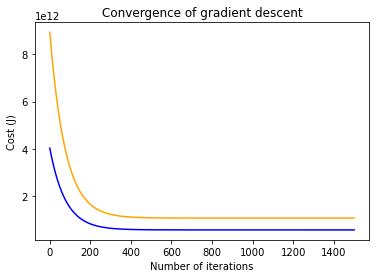

In [10]:
theta_Train = graphEverything(reqVars_1, 'False', 0.0000000003)

In [11]:
#Problem 1a:
#Below is the best parameters given by theta for the problem
theta_Train

array([2.59212175e-01, 8.55565051e+02, 8.66443149e-01, 4.19022341e-01,
       6.22605495e-01, 2.08796868e-01])

In [12]:
#Problem 1b:
#Graph is unreadable unless an extremely low learning rate is used. Error rate is also
#very high in comparison to 2a.

#Graph below is when elven variables are used to determine the best Theta values:
#'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea'

array([2.59212159e-01, 8.55564996e+02, 8.66443102e-01, 4.19022321e-01,
       6.22605465e-01, 2.24898297e-01, 7.31494358e-02, 1.41131254e-01,
       2.31643392e-02, 1.44264272e-01, 2.08796858e-01, 8.18145465e-02])

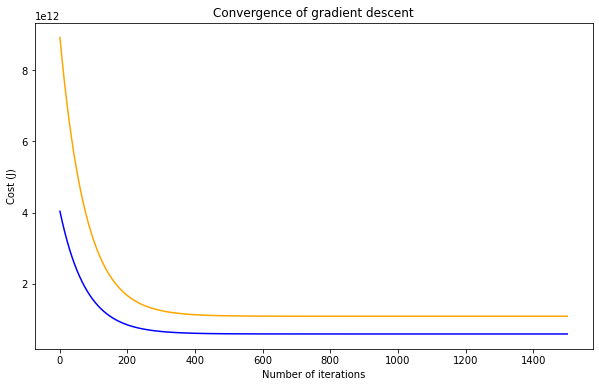

In [13]:
graphEverything(reqVars_2, 'False', 0.0000000003)

In [14]:
#Problem 1b:
#Below is the best parameters given by theta for the problem
theta_Train

array([2.59212175e-01, 8.55565051e+02, 8.66443149e-01, 4.19022341e-01,
       6.22605495e-01, 2.08796868e-01])

In [15]:
#Problem 2a:
#Graph is able to ulitize a higher alpha rate.
#Dramatically reduces the amount of error. 1a settled around a error of 1.25 compared
#to 2a which settles around 0.005. A significant difference 

#only five variables are used. These variables being:
#'area', 'bedrooms', 'bathrooms', 'stories', 'parking'

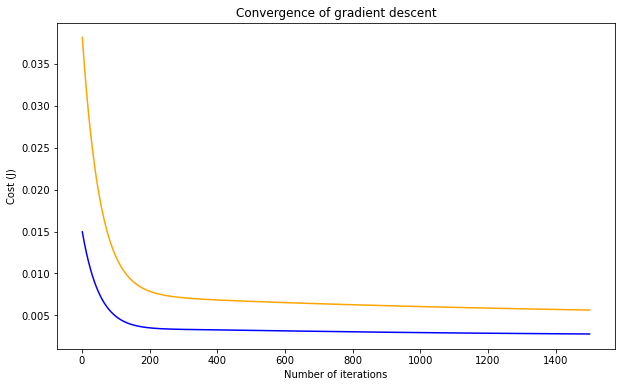

In [16]:
theta_Train = graphEverything(reqVars_1, 'True')
#This is the graph with the input normalization

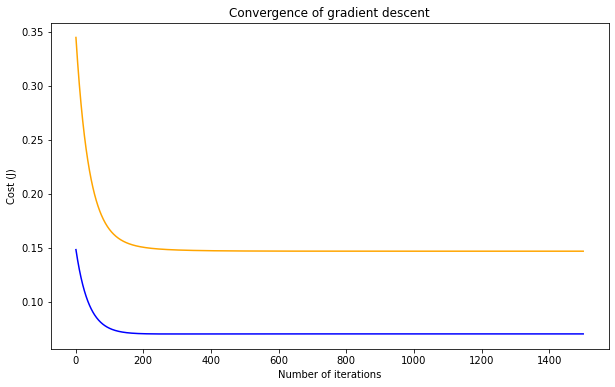

In [17]:
theta_Train = graphEverything(reqVars_1, 'Other')
#This is the graph with the input standardization

In [18]:
#Problem 2b:
#Graph is able to ulitize a higher alpha rate.
#Dramatically reduces the amount of error. 1b settled around a error of 1.25 compared
#to 2b which settles around 0.005. A significant difference.

#Graph below is when elven variables are used to determine the best Theta values:
#'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea'

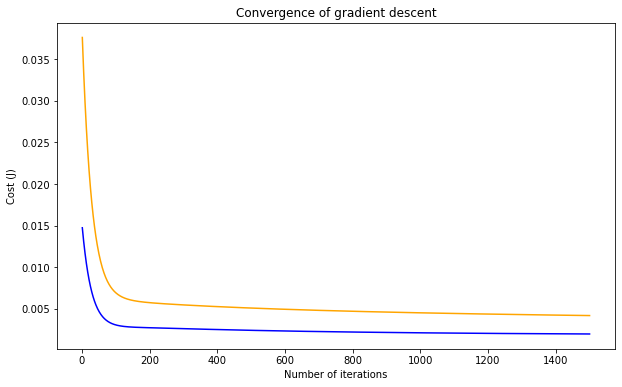

In [19]:
theta_Train = graphEverything(reqVars_2, 'True')
#This is the graph with the input normalization

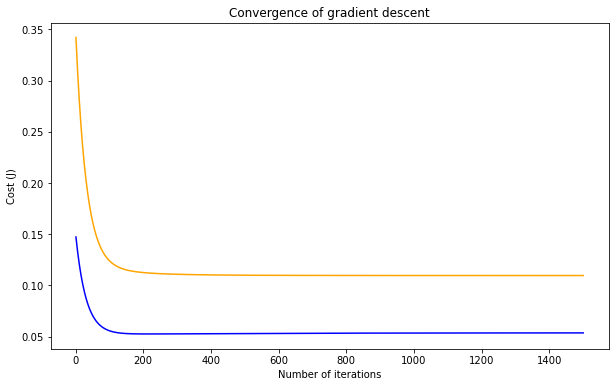

In [20]:
theta_Train = graphEverything(reqVars_2, 'Other')
#This is the graph with the input standardization

In [21]:
#Problem 3a:
#The graph does not actually seem to improve by very much. This could be due
#to the fucntion generated in "GraphEverything" which branches to "Compute_cost"
#which if penalty is not == to 0 has a new J equation "J = 1/(2*m) * (np.sum(sqrErrors) + penalty * (np.sum(theta) - theta[0]))".
#It is possible this generalizes the model.

#only five variables are used. These variables being:
#'area', 'bedrooms', 'bathrooms', 'stories', 'parking'

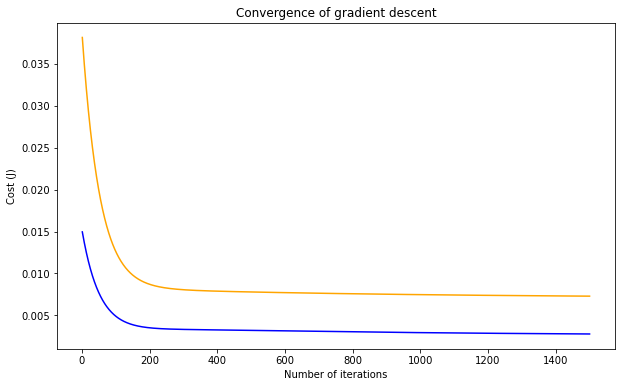

In [22]:
theta_Train = graphEverything(reqVars_1, 'True', 0.01, 3)

In [23]:
#Problem 3b:
#The graph does not actually seem to improve by very much. This could be due
#to the fucntion generated in "GraphEverything" which branches to "Compute_cost"
#which if penalty is not == to 0 has a new J equation "J = 1/(2*m) * (np.sum(sqrErrors) + penalty * (np.sum(theta) - theta[0]))".
#It is possible this generalizes the model.

#Graph below is when elven variables are used to determine the best Theta values:
#'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea'

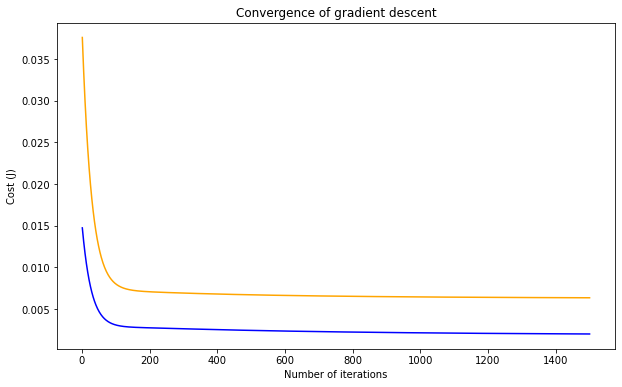

In [24]:
theta_Train = graphEverything(reqVars_2, 'True', 0.01, 3)